In [1]:
%load_ext autoreload
%autoreload 2

In [180]:
from fastcore.xtras import save_pickle, load_pickle
from glob import glob 
import pandas as pd 
from pathlib import Path

import matplotx

import matplotlib.pyplot as plt 
from gptchem.plotsettings import *
from gptchem.settings import ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH, ONE_COL_GOLDEN_RATIO_HEIGHT_INCH, TWO_COL_WIDTH_INCH

In [181]:
all_res = glob('out/*/*.pkl')

In [182]:
all_compiled_res = []

for res in all_res:
    res = load_pickle(res)
    compiled = {
        'train_size': res['train_size'],
        'num_classes': res['num_classes'],
        'representation': res['representation'],
        'model': res['model'],
        **res['metrics']
    }
    all_compiled_res.append(compiled)

In [183]:
df = pd.DataFrame(all_compiled_res)

In [184]:
grouped_df = df.groupby(['train_size', 'num_classes', 'representation', 'model']).agg(['mean', 'std'])

/var/folders/m9/_txh68y946s4pxy1x2wnd3lh0000gn/T/ipykernel_16311/1809863461.py:1: FutureWarning: ['confusion_matrix', 'all_y_true', 'all_y_pred', 'valid_indices'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.groupby(['train_size', 'num_classes', 'representation', 'model']).agg(['mean', 'std'])


In [185]:
grouped_df

accuracy            \
                                                            mean       std   
train_size num_classes representation model                                  
5          2           SMILES         code-davinci-002  0.635000  0.036968   
                                      text-ada-001      0.323091  0.029417   
                                      text-babbage-001  0.454672  0.049005   
                                      text-curie-001    0.421717  0.077533   
                                      text-davinci-003  0.547500  0.023629   
...                                                          ...       ...   
100        5           name           code-davinci-002  0.335000  0.021213   
                                      text-ada-001      0.205000  0.035355   
                                      text-babbage-001  0.235000  0.021213   
                                      text-curie-001    0.200000  0.028284   
                                      text-davinci-003  0.245000  0.035355   

                                                       acc_macro            \
                                                            mean       std   
train_size num_classes representation model                                  
5          2           SMILES         code-davinci-002  0.725000  0.073912   
                                      text-ada-001      0.855828  0.030537   
                                      text-babbage-001  0.757475  0.080448   
                                      text-curie-001    0.735690  0.048825   
                                      text-davinci-003  0.735417  0.049951   
...                                                          ...       ...   
100        5           name           code-davinci-002  0.734000  0.008485   
                                      text-ada-001      0.682000  0.014142   
                                      text-babbage-001  0.694000  0.008485   
                                      text-curie-001    0.680000  0.011314   
                                      text-davinci-003  0.698000  0.014142   

                                                            racc            \
                                                            mean       std   
train_size num_classes representation model                                  
5          2           SMILES         code-davinci-002  0.490525  0.014808   
                                      text-ada-001      0.327192  0.028664   
                                      text-babbage-001  0.462271  0.042566   
                                      text-curie-001    0.452326  0.046483   
                                      text-davinci-003  0.496925  0.021711   
...                                                          ...       ...   
100        5           name           code-davinci-002  0.213850  0.024537   
                                      text-ada-001      0.189300  0.003677   
                                      text-babbage-001  0.189150  0.004879   
                                      text-curie-001    0.175400  0.012587   
                                      text-davinci-003  0.214350  0.025951   

                                                           kappa            \
                                                            mean       std   
train_size num_classes representation model                                  
5          2           SMILES         code-davinci-002  0.281655  0.090229   
                                      text-ada-001     -0.006360  0.028824   
                                      text-babbage-001 -0.013745  0.027767   
                                      text-curie-001   -0.052892  0.060863   
                                      text-davinci-003  0.100558  0.025722   
...                                                          ...       ...   
100        5           name           code-davinci-002  0.153272  0.053411 

In [186]:
gpr_results = pd.read_pickle('/Users/kevinmaikjablonka/git/kjappelbaum/gptchem/experiments/03_classification/photoswitch/xgboost_results.pkl')
tabpfn_results = pd.read_pickle('/Users/kevinmaikjablonka/git/kjappelbaum/gptchem/experiments/03_classification/photoswitch/tabpfn_results.pkl')

In [187]:
gpr_results

accuracy                      f1_macro            \
                            mean       std       sem      mean       std   
num_classes train_size                                                     
2           10          0.648376  0.141693  0.016699  0.574723  0.215287   
            20          0.758118  0.117627  0.017535  0.733342  0.162960   
            50          0.824787  0.058971  0.008178  0.821165  0.065290   
            100         0.898182  0.026629  0.004635  0.897974  0.026808   
            200         0.891818  0.025181  0.004383  0.891751  0.025177   
5           10          0.322376  0.098830  0.012759  0.272508  0.136845   
            20          0.364498  0.086993  0.014919  0.340586  0.113124   
            50          0.445150  0.085855  0.013248  0.433477  0.089667   
            100         0.555000  0.036116  0.007372  0.553357  0.037676   
            200         0.644444  0.028465  0.005478  0.639732  0.030063   

                                  f1_micro                         kappa  \
                             sem      mean       std       sem      mean   
num_classes train_size                                                     
2           10          0.025372  0.648376  0.141693  0.016699  0.296752   
            20          0.024293  0.758118  0.117627  0.017535  0.516235   
            50          0.009054  0.824787  0.058971  0.008178  0.649575   
            100         0.004667  0.898182  0.026629  0.004635  0.796364   
            200         0.004383  0.891818  0.025181  0.004383  0.783636   
5           10          0.017667  0.322376  0.098830  0.012759  0.160608   
            20          0.019401  0.364498  0.086993  0.014919  0.209653   
            50          0.013836  0.445150  0.085855  0.013248  0.309065   
            100         0.007691  0.555000  0.036116  0.007372  0.443977   
            200         0.005786  0.644444  0.028465  0.005478  0.555219   

                                            
                             std       sem  
num_classes train_size                      
2           10          0.283386  0.033397  
            20          0.235254  0.035070  
            50          0.117942  0.016356  
            100         0.053258  0.009271  
            200         0.050362  0.008767  
5           10          0.118845  0.015343  
            20          0.107439  0.018426  
            50          0.105999  0.016356  
            100         0.045467  0.009281  
            200         0.035870  0.006903

In [188]:
models = [
    "text-davinci-003",
    "text-ada-001",
    "text-babbage-001",
    "text-curie-001",
    "code-davinci-002",
]

representations = ["name", "SMILES", "inchi", "selfies"]

In [189]:
max_x = 100

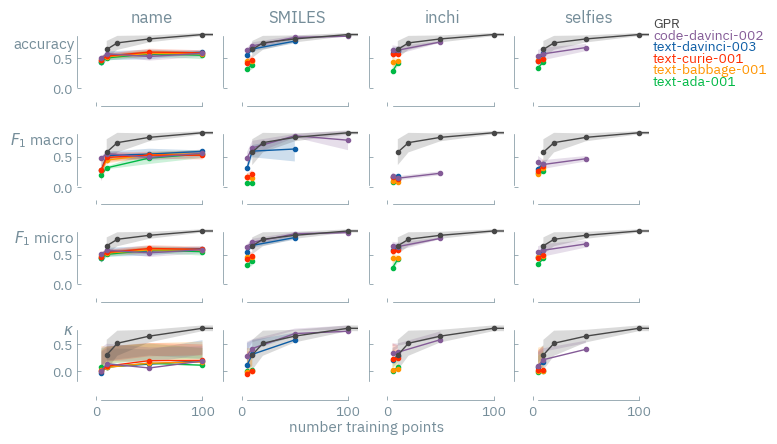

In [191]:
fig, ax = plt.subplots(
    4, 4, sharex="all", sharey="row", figsize=(TWO_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH)
)


# plot accuracy for 2 class as a function of the training size
for i, rpr in enumerate(representations):
    for model in models:
        ax[0][i].plot(
            grouped_df.loc[:, 2, rpr, model].index.values,
            grouped_df.loc[(slice(None), 2, rpr, model), "accuracy"]["mean"].values,
            label=f"{model}",
            marker="o",
        )
        ax[0][i].fill_between(
            grouped_df.loc[:, 2, rpr, model].index.values,
            grouped_df.loc[(slice(None), 2, rpr, model), "accuracy"]["mean"].values - grouped_df.loc[(slice(None), 2, rpr, model), "accuracy"]["std"].values,
            grouped_df.loc[(slice(None), 2, rpr, model), "accuracy"]["mean"].values + grouped_df.loc[(slice(None), 2, rpr, model), "accuracy"]["std"].values,
            alpha=0.2,
        )

    ax[0][i].set_title(f"{rpr}")

    ax[0][i].plot(
        gpr_results.loc[2, :].index.values,
        gpr_results.loc[2, :]["accuracy"]["mean"].values,
        label=f"GPR",
        marker="o",
    )

    ax[0][i].fill_between(
        gpr_results.loc[2, :].index.values,
        gpr_results.loc[2, :]["accuracy"]["mean"].values - gpr_results.loc[2, :]["accuracy"]["std"].values,
        gpr_results.loc[2, :]["accuracy"]["mean"].values + gpr_results.loc[2, :]["accuracy"]["std"].values,
        alpha=0.2,
    )


    range_frame(
        ax[0][i],
        np.array([5,max_x]),
        np.array([df["accuracy"].min(), df["accuracy"].max()]),
    )

ylabel_top(
    "accuracy",
    ax[0][0],
       x_pad=0.1
)
# range_frame(ax[0][i], grouped_df.loc[:, 2, rpr, model].index.values, np.array([0, 1]))

for i, rpr in enumerate(representations):
    for model in models:
        ax[1][i].plot(
            grouped_df.loc[:, 2, rpr, model].index.values,
            grouped_df.loc[(slice(None), 2, rpr, model), "f1_macro"]["mean"].values,
            label=f"{model}",
            marker="o",
        )

        ax[1][i].fill_between(
            grouped_df.loc[:, 2, rpr, model].index.values,
            grouped_df.loc[(slice(None), 2, rpr, model), "f1_macro"]["mean"].values - grouped_df.loc[(slice(None), 2, rpr, model), "f1_macro"]["std"].values,
            grouped_df.loc[(slice(None), 2, rpr, model), "f1_macro"]["mean"].values + grouped_df.loc[(slice(None), 2, rpr, model), "f1_macro"]["std"].values,
            alpha=0.2,
        )

        range_frame(
            ax[1][i],
                    np.array([5,max_x]),
            np.array([df["f1_macro"].min(), df["f1_macro"].max()]),
        )

    ax[1][i].plot(
        gpr_results.loc[2, :].index.values,
        gpr_results.loc[2, :]["f1_macro"]["mean"].values,
        label=f"GPR",
        marker="o",
    )

    ax[1][i].fill_between(
        gpr_results.loc[2, :].index.values,
        gpr_results.loc[2, :]["f1_macro"]["mean"].values - gpr_results.loc[2, :]["f1_macro"]["std"].values,
        gpr_results.loc[2, :]["f1_macro"]["mean"].values + gpr_results.loc[2, :]["f1_macro"]["std"].values,
        alpha=0.2,
    )

ylabel_top(
    r"$F_1$ macro",
    ax[1][0],
       x_pad=0.1
)


for i, rpr in enumerate(representations):
    for model in models:
        ax[2][i].plot(
            grouped_df.loc[:, 2, rpr, model].index.values,
            grouped_df.loc[(slice(None), 2, rpr, model), "f1_micro"]["mean"].values,
            label=f"{model}",
            marker="o",
        )

        ax[2][i].fill_between(
            grouped_df.loc[:, 2, rpr, model].index.values,
            grouped_df.loc[(slice(None), 2, rpr, model), "f1_micro"]["mean"].values - grouped_df.loc[(slice(None), 2, rpr, model), "f1_micro"]["std"].values,
            grouped_df.loc[(slice(None), 2, rpr, model), "f1_micro"]["mean"].values + grouped_df.loc[(slice(None), 2, rpr, model), "f1_micro"]["std"].values,
            alpha=0.2,
        )

        range_frame(
            ax[2][i],
                    np.array([5,max_x]),
            np.array([df["f1_micro"].min(), df["f1_micro"].max()]),
        )

    ax[2][i].plot(
        gpr_results.loc[2, :].index.values,
        gpr_results.loc[2, :]["f1_micro"]["mean"].values,
        label=f"GPR",
        marker="o",
    )

    ax[2][i].fill_between(
        gpr_results.loc[2, :].index.values,
        gpr_results.loc[2, :]["f1_micro"]["mean"].values - gpr_results.loc[2, :]["f1_micro"]["std"].values,
        gpr_results.loc[2, :]["f1_micro"]["mean"].values + gpr_results.loc[2, :]["f1_micro"]["std"].values,
        alpha=0.2,
    )

ylabel_top(
    r"$F_1$ micro",
    ax[2][0],
       x_pad=0.1
)


for i, rpr in enumerate(representations):
    for model in models:
        ax[3][i].plot(
            grouped_df.loc[:, 2, rpr, model].index.values,
            grouped_df.loc[(slice(None), 2, rpr, model), "kappa"]["mean"].values,
            label=f"{model}",
            marker="o",
        )

        ax[3][i].fill_between(
            grouped_df.loc[:, 2, rpr, model].index.values,
            grouped_df.loc[(slice(None), 2, rpr, model), "f1_micro"]["mean"].values - grouped_df.loc[(slice(None), 2, rpr, model), "kappa"]["std"].values,
            grouped_df.loc[(slice(None), 2, rpr, model), "kappa"]["mean"].values + grouped_df.loc[(slice(None), 2, rpr, model), "kappa"]["std"].values,
            alpha=0.2,
        )

        range_frame(
            ax[3][i],
                    np.array([5,max_x]),
            np.array([df["kappa"].min(), df["kappa"].max()]),
        )

    ax[3][i].plot(
        gpr_results.loc[2, :].index.values,
        gpr_results.loc[2, :]["kappa"]["mean"].values,
        label=f"GPR",
        marker="o",
    )

    ax[3][i].fill_between(
        gpr_results.loc[2, :].index.values,
        gpr_results.loc[2, :]["kappa"]["mean"].values - gpr_results.loc[2, :]["kappa"]["std"].values,
        gpr_results.loc[2, :]["kappa"]["mean"].values + gpr_results.loc[2, :]["kappa"]["std"].values,
        alpha=0.2,
    )

ylabel_top(
    r"$\kappa$",
    ax[3][0],
    x_pad=0.1
)

matplotx.line_labels(ax[0][3])
plt.subplots_adjust(hspace=0.6, top=1, bottom=0.2)


fig.text(0.4, 0.1, "number training points", fontdict={"size": 11})

fig.savefig('few_shot_learning.pdf', bbox_inches='tight')

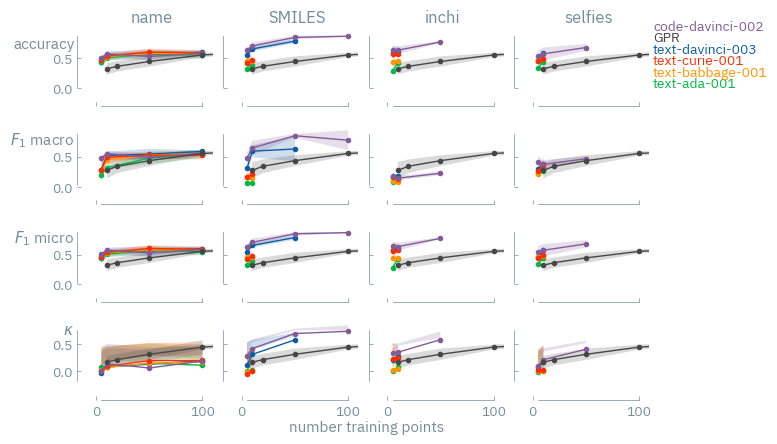

In [192]:
fig, ax = plt.subplots(
    4, 4, sharex="all", sharey="row", figsize=(TWO_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH)
)


# plot accuracy for 2 class as a function of the training size
for i, rpr in enumerate(representations):
    for model in models:
        ax[0][i].plot(
            grouped_df.loc[:, 2, rpr, model].index.values,
            grouped_df.loc[(slice(None), 2, rpr, model), "accuracy"]["mean"].values,
            label=f"{model}",
            marker="o",
        )
        ax[0][i].fill_between(
            grouped_df.loc[:, 2, rpr, model].index.values,
            grouped_df.loc[(slice(None), 2, rpr, model), "accuracy"]["mean"].values - grouped_df.loc[(slice(None), 2, rpr, model), "accuracy"]["std"].values,
            grouped_df.loc[(slice(None), 2, rpr, model), "accuracy"]["mean"].values + grouped_df.loc[(slice(None), 2, rpr, model), "accuracy"]["std"].values,
            alpha=0.2,
        )

    ax[0][i].set_title(f"{rpr}")

    ax[0][i].plot(
        gpr_results.loc[5, :].index.values,
        gpr_results.loc[5, :]["accuracy"]["mean"].values,
        label=f"GPR",
        marker="o",
    )

    ax[0][i].fill_between(
        gpr_results.loc[5, :].index.values,
        gpr_results.loc[5, :]["accuracy"]["mean"].values - gpr_results.loc[5, :]["accuracy"]["std"].values,
        gpr_results.loc[5, :]["accuracy"]["mean"].values + gpr_results.loc[5, :]["accuracy"]["std"].values,
        alpha=0.2,
    )


    range_frame(
        ax[0][i],
        np.array([5,max_x]),
        np.array([df["accuracy"].min(), df["accuracy"].max()]),
    )

ylabel_top(
    "accuracy",
    ax[0][0],
       x_pad=0.1
)
# range_frame(ax[0][i], grouped_df.loc[:, 2, rpr, model].index.values, np.array([0, 1]))

for i, rpr in enumerate(representations):
    for model in models:
        ax[1][i].plot(
            grouped_df.loc[:, 2, rpr, model].index.values,
            grouped_df.loc[(slice(None), 2, rpr, model), "f1_macro"]["mean"].values,
            label=f"{model}",
            marker="o",
        )

        ax[1][i].fill_between(
            grouped_df.loc[:, 2, rpr, model].index.values,
            grouped_df.loc[(slice(None), 2, rpr, model), "f1_macro"]["mean"].values - grouped_df.loc[(slice(None), 2, rpr, model), "f1_macro"]["std"].values,
            grouped_df.loc[(slice(None), 2, rpr, model), "f1_macro"]["mean"].values + grouped_df.loc[(slice(None), 2, rpr, model), "f1_macro"]["std"].values,
            alpha=0.2,
        )

        range_frame(
            ax[1][i],
                    np.array([5,max_x]),
            np.array([df["f1_macro"].min(), df["f1_macro"].max()]),
        )

    ax[1][i].plot(
        gpr_results.loc[5, :].index.values,
        gpr_results.loc[5, :]["f1_macro"]["mean"].values,
        label=f"GPR",
        marker="o",
    )

    ax[1][i].fill_between(
        gpr_results.loc[5, :].index.values,
        gpr_results.loc[5, :]["f1_macro"]["mean"].values - gpr_results.loc[5, :]["f1_macro"]["std"].values,
        gpr_results.loc[5, :]["f1_macro"]["mean"].values + gpr_results.loc[5, :]["f1_macro"]["std"].values,
        alpha=0.2,
    )

ylabel_top(
    r"$F_1$ macro",
    ax[1][0],
       x_pad=0.1
)


for i, rpr in enumerate(representations):
    for model in models:
        ax[2][i].plot(
            grouped_df.loc[:, 2, rpr, model].index.values,
            grouped_df.loc[(slice(None), 2, rpr, model), "f1_micro"]["mean"].values,
            label=f"{model}",
            marker="o",
        )

        ax[2][i].fill_between(
            grouped_df.loc[:, 2, rpr, model].index.values,
            grouped_df.loc[(slice(None), 2, rpr, model), "f1_micro"]["mean"].values - grouped_df.loc[(slice(None), 2, rpr, model), "f1_micro"]["std"].values,
            grouped_df.loc[(slice(None), 2, rpr, model), "f1_micro"]["mean"].values + grouped_df.loc[(slice(None), 2, rpr, model), "f1_micro"]["std"].values,
            alpha=0.2,
        )

        range_frame(
            ax[2][i],
                    np.array([5,max_x]),
            np.array([df["f1_micro"].min(), df["f1_micro"].max()]),
        )

    ax[2][i].plot(
        gpr_results.loc[5, :].index.values,
        gpr_results.loc[5, :]["f1_micro"]["mean"].values,
        label=f"GPR",
        marker="o",
    )

    ax[2][i].fill_between(
        gpr_results.loc[5, :].index.values,
        gpr_results.loc[5, :]["f1_micro"]["mean"].values - gpr_results.loc[5, :]["f1_micro"]["std"].values,
        gpr_results.loc[5, :]["f1_micro"]["mean"].values + gpr_results.loc[5, :]["f1_micro"]["std"].values,
        alpha=0.2,
    )

ylabel_top(
    r"$F_1$ micro",
    ax[2][0],
       x_pad=0.1
)


for i, rpr in enumerate(representations):
    for model in models:
        ax[3][i].plot(
            grouped_df.loc[:, 2, rpr, model].index.values,
            grouped_df.loc[(slice(None), 2, rpr, model), "kappa"]["mean"].values,
            label=f"{model}",
            marker="o",
        )

        ax[3][i].fill_between(
            grouped_df.loc[:, 2, rpr, model].index.values,
            grouped_df.loc[(slice(None), 2, rpr, model), "f1_micro"]["mean"].values - grouped_df.loc[(slice(None), 2, rpr, model), "kappa"]["std"].values,
            grouped_df.loc[(slice(None), 2, rpr, model), "kappa"]["mean"].values + grouped_df.loc[(slice(None), 2, rpr, model), "kappa"]["std"].values,
            alpha=0.2,
        )

        range_frame(
            ax[3][i],
                    np.array([5,max_x]),
            np.array([df["kappa"].min(), df["kappa"].max()]),
        )

    ax[3][i].plot(
        gpr_results.loc[5, :].index.values,
        gpr_results.loc[5, :]["kappa"]["mean"].values,
        label=f"GPR",
        marker="o",
    )

    ax[3][i].fill_between(
        gpr_results.loc[5, :].index.values,
        gpr_results.loc[5, :]["kappa"]["mean"].values - gpr_results.loc[5, :]["kappa"]["std"].values,
        gpr_results.loc[5, :]["kappa"]["mean"].values + gpr_results.loc[5, :]["kappa"]["std"].values,
        alpha=0.2,
    )

ylabel_top(
    r"$\kappa$",
    ax[3][0],
    x_pad=0.1
)

matplotx.line_labels(ax[0][3])
plt.subplots_adjust(hspace=0.6, top=1, bottom=0.2)


fig.text(0.4, 0.1, "number training points", fontdict={"size": 11})

fig.savefig('few_shot_learning_5.pdf', bbox_inches='tight')